# Housing data

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
url = 'https://raw.githubusercontent.com/Jessadakorn-pun/Dataset/main/HousingData.csv'
df = pd.read_csv(url)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
X = imp.fit_transform(df[['LSTAT']])
y = df[['MEDV']].values

# Spliting data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1)

# Stnadardized data

In [6]:
## regression in neural network must scale for both x and y
scl = StandardScaler()
X_train_s = scl.fit_transform(X_train)
X_test_s = scl.transform(X_test)

from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
y_train_s = mn.fit_transform(y_train)
y_test_s = mn.transform(y_test)

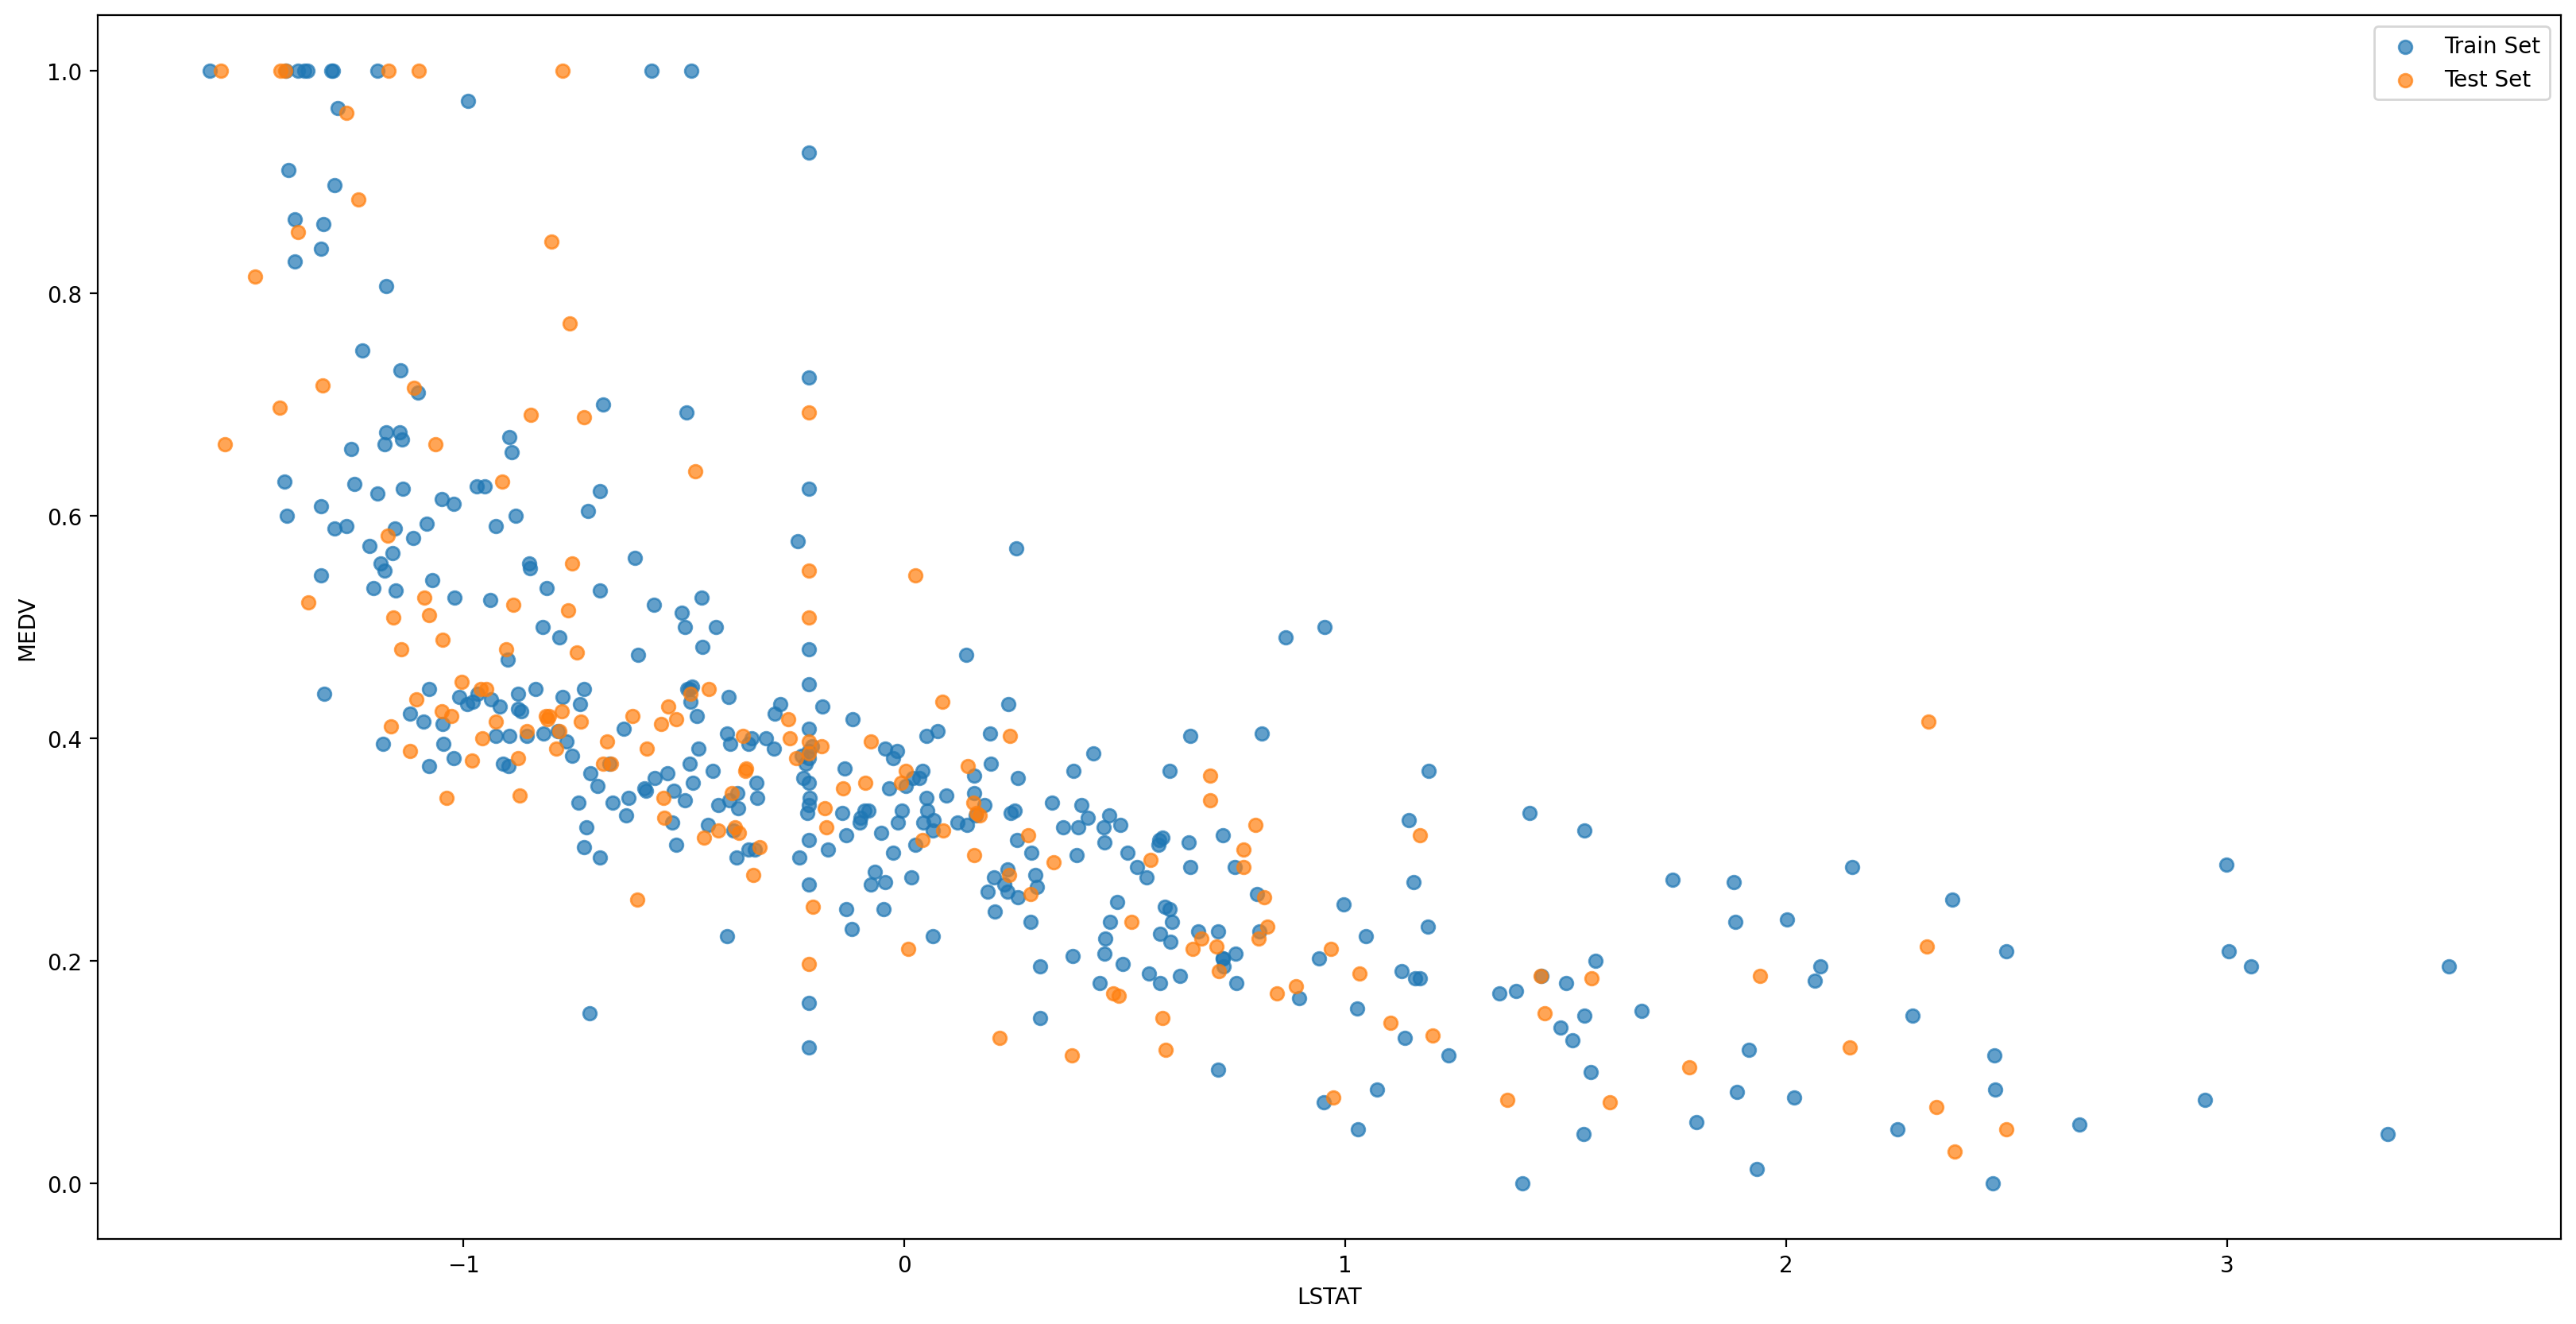

In [7]:
fig = plt.figure(figsize=(20, 10))
plt.scatter(X_train_s, y_train_s, alpha=.7, label='Train Set')
plt.scatter(X_test_s, y_test_s, alpha=.7, label='Test Set')
plt.legend()
plt.xlabel('LSTAT')
plt.ylabel('MEDV');

In [8]:
## modeling
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(1, )),
    tf.keras.layers.Dense(units=16, activation='relu', name='hidden1'),
    tf.keras.layers.Dense(units=1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden1 (Dense)             (None, 16)                32        
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 49 (196.00 Byte)
Trainable params: 49 (196.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
## Setting compiele
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mean_absolute_percentage_error']
)

In [10]:
## fitting model
tf_fit = model.fit(
    x=X_train_s, 
    y=y_train_s,
    batch_size=16,
    validation_split=.1,
    epochs=100,
    verbose=1
    )

Epoch 1/100
20/20 [==============================] - 0s 4ms/step - loss: 0.2681 - mean_absolute_percentage_error: 618228.7500 - val_loss: 0.1547 - val_mean_absolute_percentage_error: 6848228.0000
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1544 - mean_absolute_percentage_error: 155266.5469 - val_loss: 0.0837 - val_mean_absolute_percentage_error: 1439090.1250
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0952 - mean_absolute_percentage_error: 305477.7812 - val_loss: 0.0502 - val_mean_absolute_percentage_error: 5600858.0000
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0632 - mean_absolute_percentage_error: 636468.2500 - val_loss: 0.0323 - val_mean_absolute_percentage_error: 6813918.0000
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.0439 - mean_absolute_percentage_error: 701446.8750 - val_loss: 0.0207 - val_mean_absolute_percentage_error: 6095832.5000
Epoch 6/100
20/20 [=

Text(0, 0.5, '% MAE')

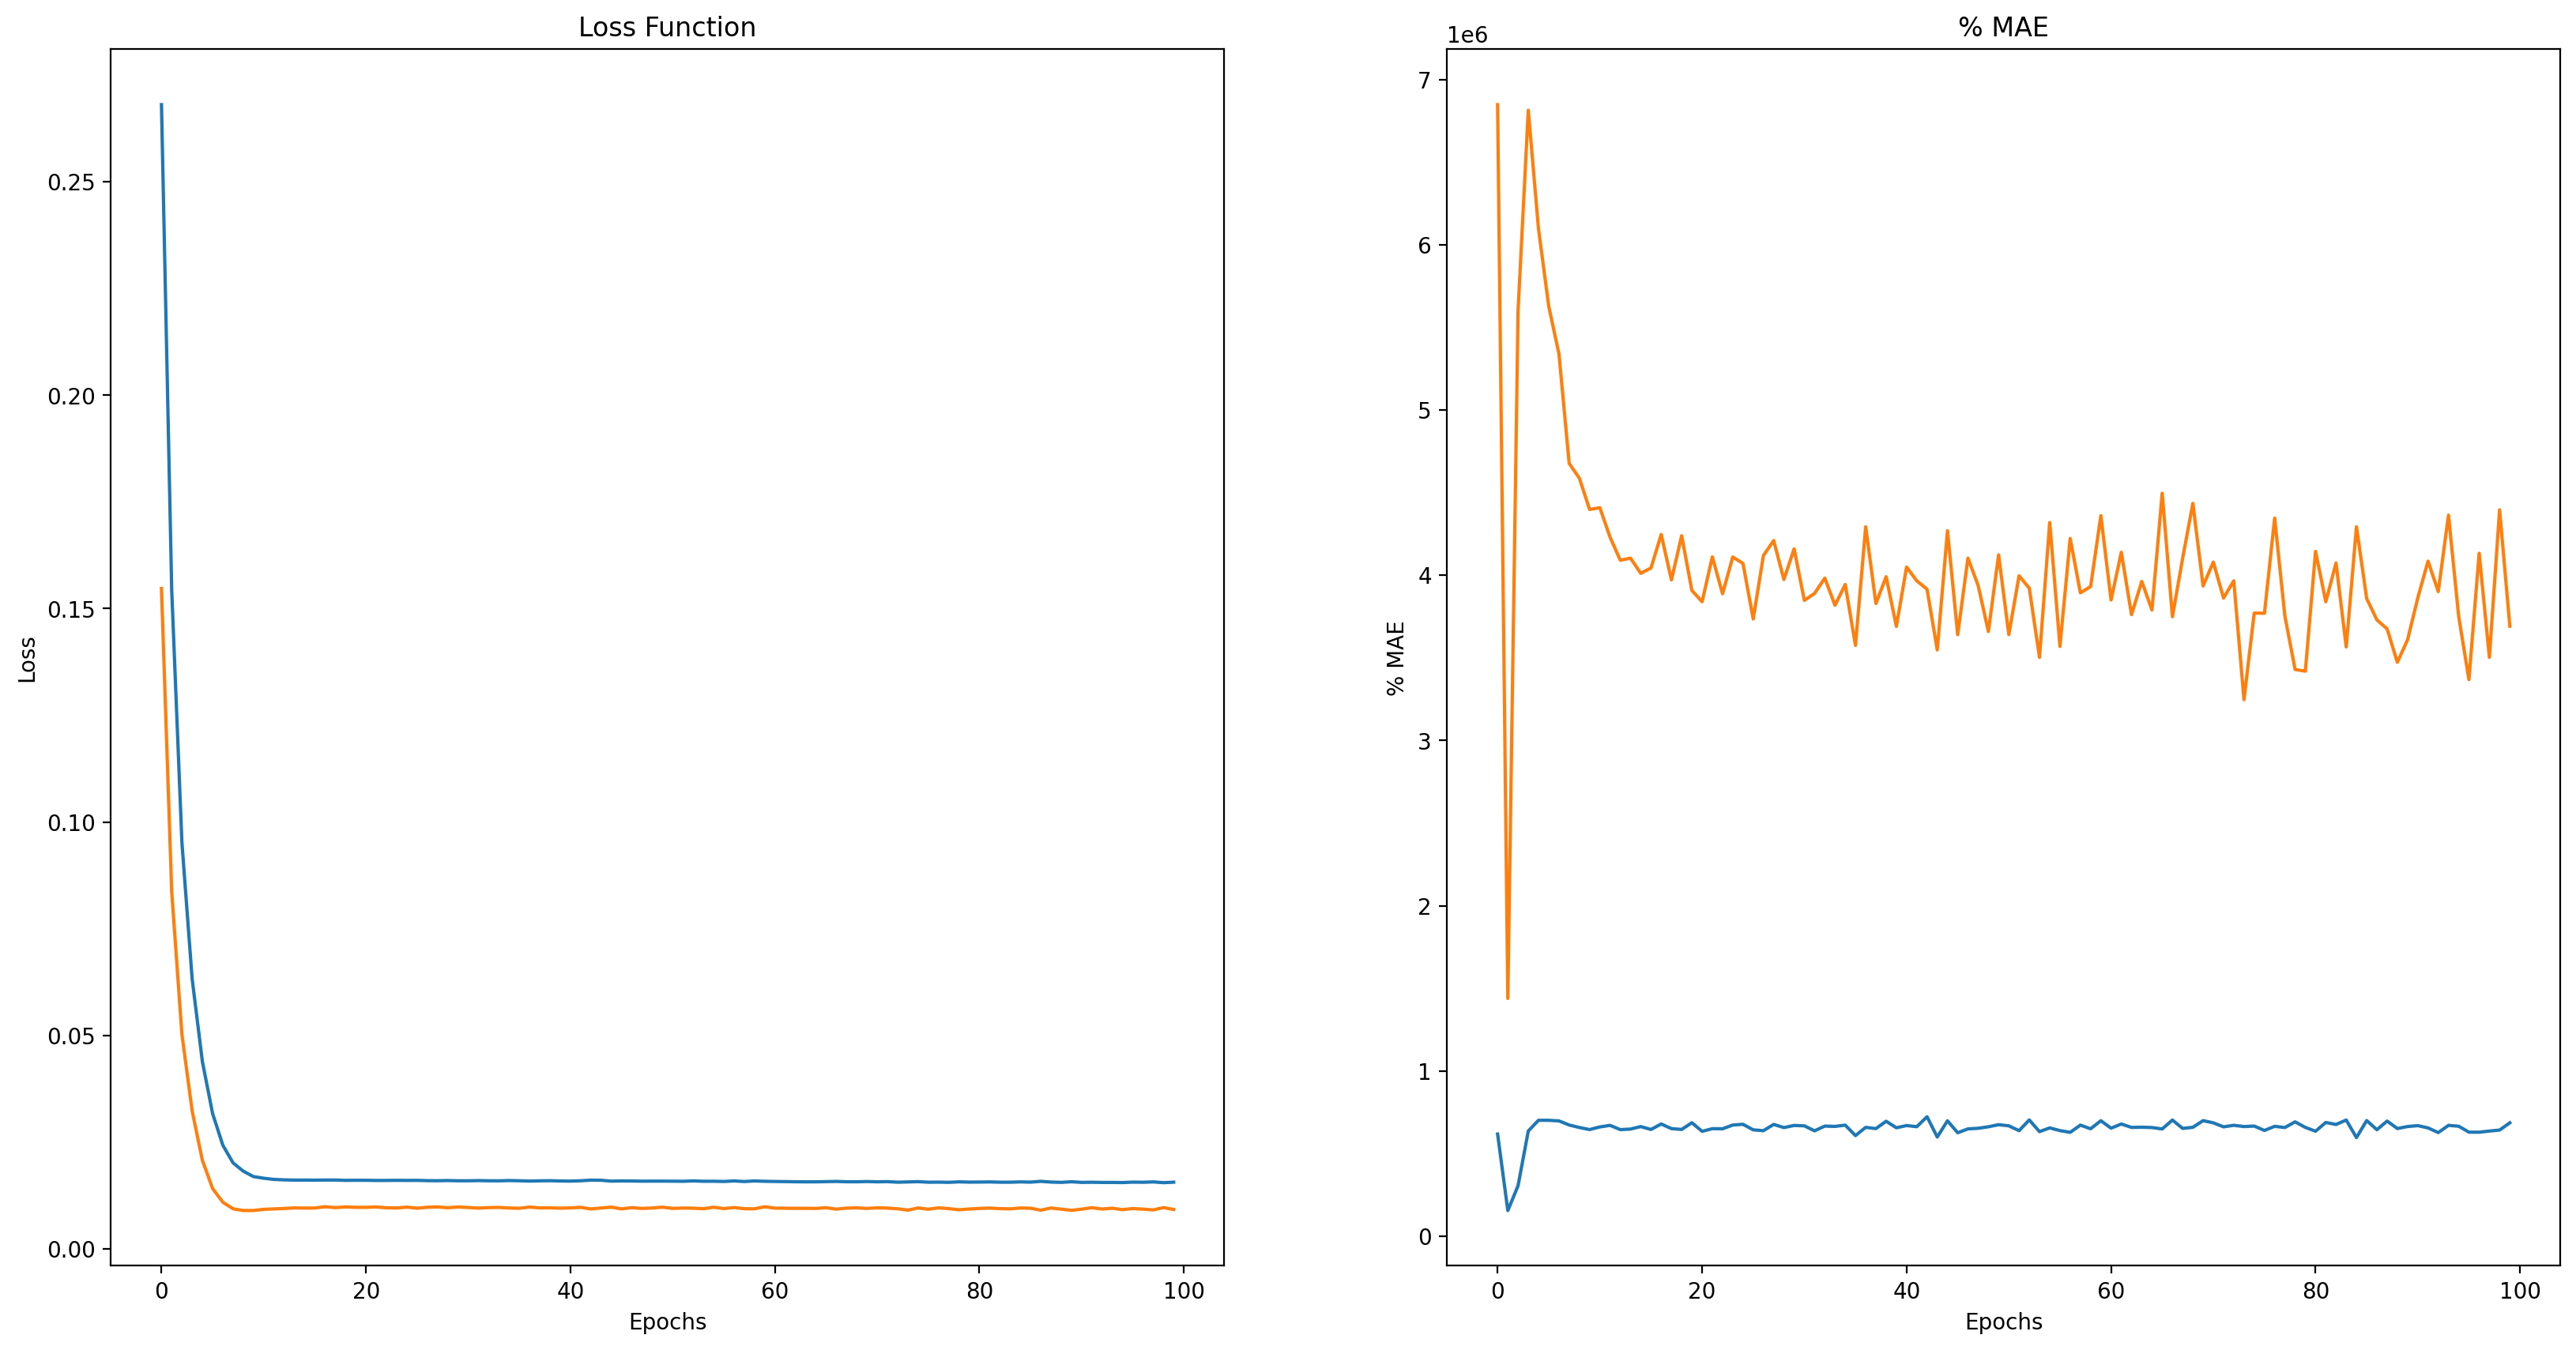

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].plot(tf_fit.history['loss'])
ax[0].plot(tf_fit.history['val_loss'])
ax[0].set_title('Loss Function')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')

ax[1].plot(tf_fit.history['mean_absolute_percentage_error'])
ax[1].plot(tf_fit.history['val_mean_absolute_percentage_error'])
ax[1].set_title('% MAE')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('% MAE')


In [22]:
## predict
y_train_pred = model.predict(X_train_s)
y_test_pred = model.predict(X_test_s)

5/5 [==============================] - 0s 481us/step


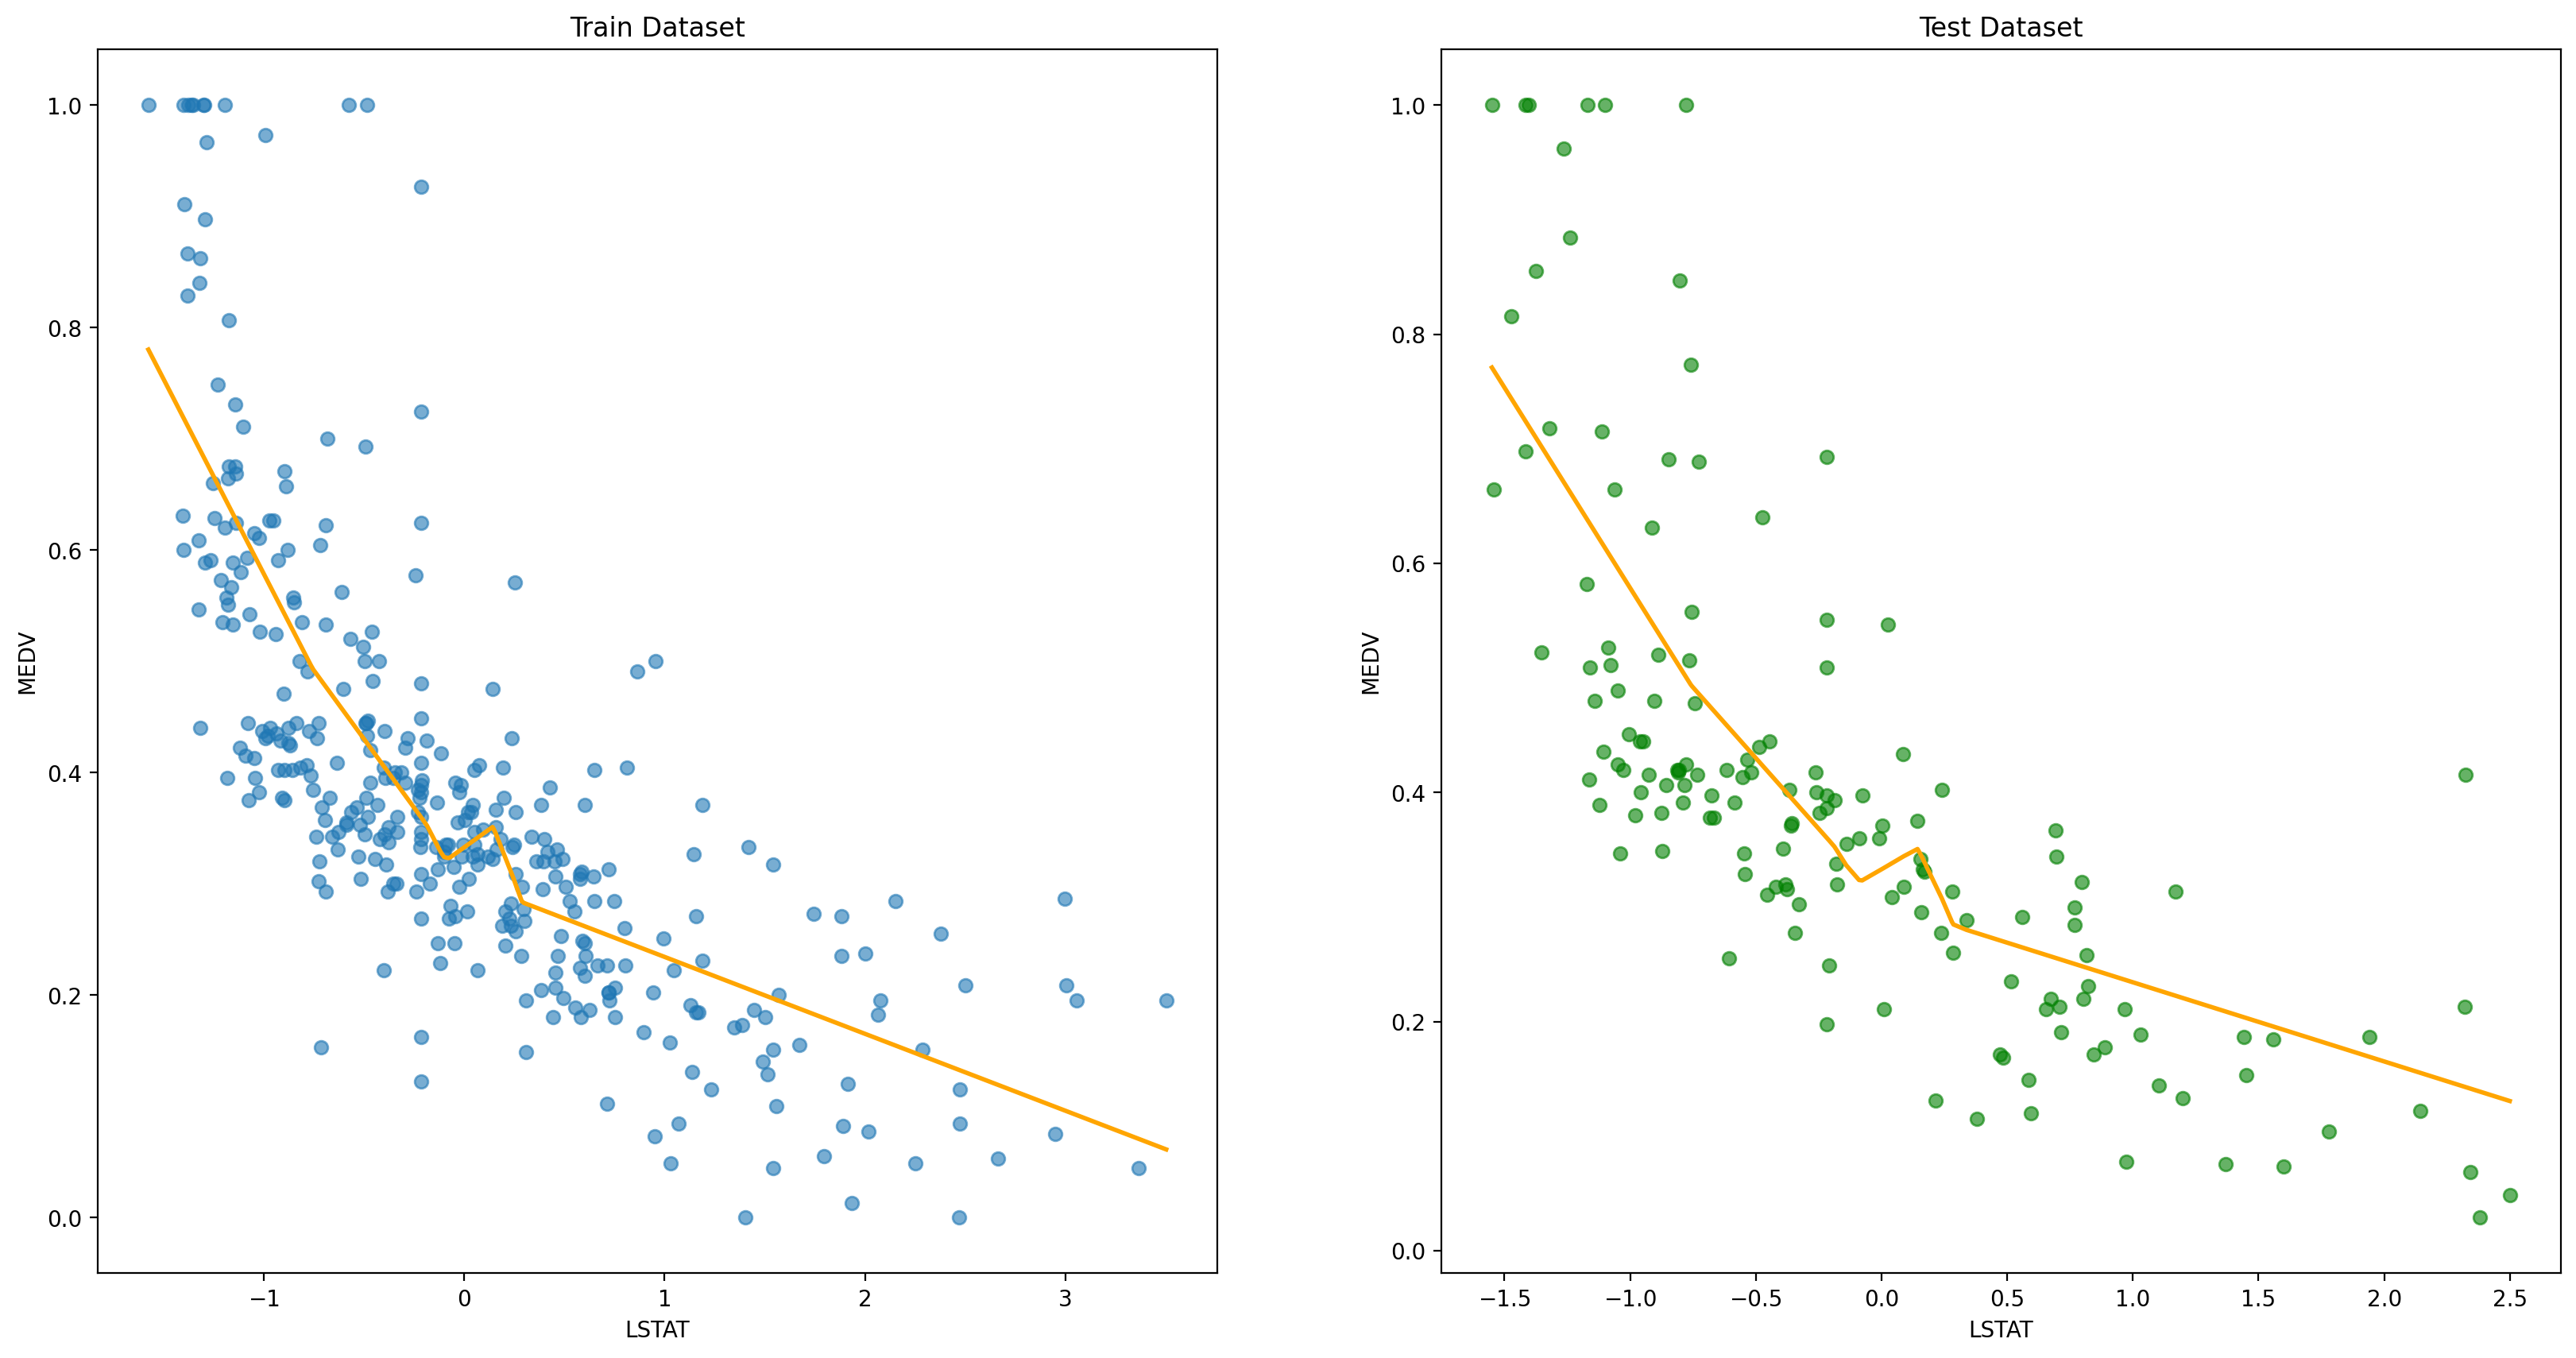

In [67]:
## plotting result
idx_train = np.argsort(X_train_s, axis=0).ravel()
idx_test = np.argsort(X_test_s, axis=0).ravel()

fig, ax= plt.subplots(1, 2, figsize=(20, 10))
ax[0].scatter(X_train_s[idx_train], y_train_s[idx_train], alpha=.6)
ax[0].plot(X_train_s[idx_train], y_train_pred[idx_train], color='orange', lw=2)
ax[0].set_title('Train Dataset')
ax[0].set_xlabel('LSTAT')
ax[0].set_ylabel('MEDV')

ax[1].scatter(X_test_s[idx_test], y_test_s[idx_test], color='green', alpha=.6)
ax[1].plot(X_test_s[idx_test], y_test_pred[idx_test], color='orange', lw=2)
ax[1].set_title('Test Dataset')
ax[1].set_xlabel('LSTAT')
ax[1].set_ylabel('MEDV');

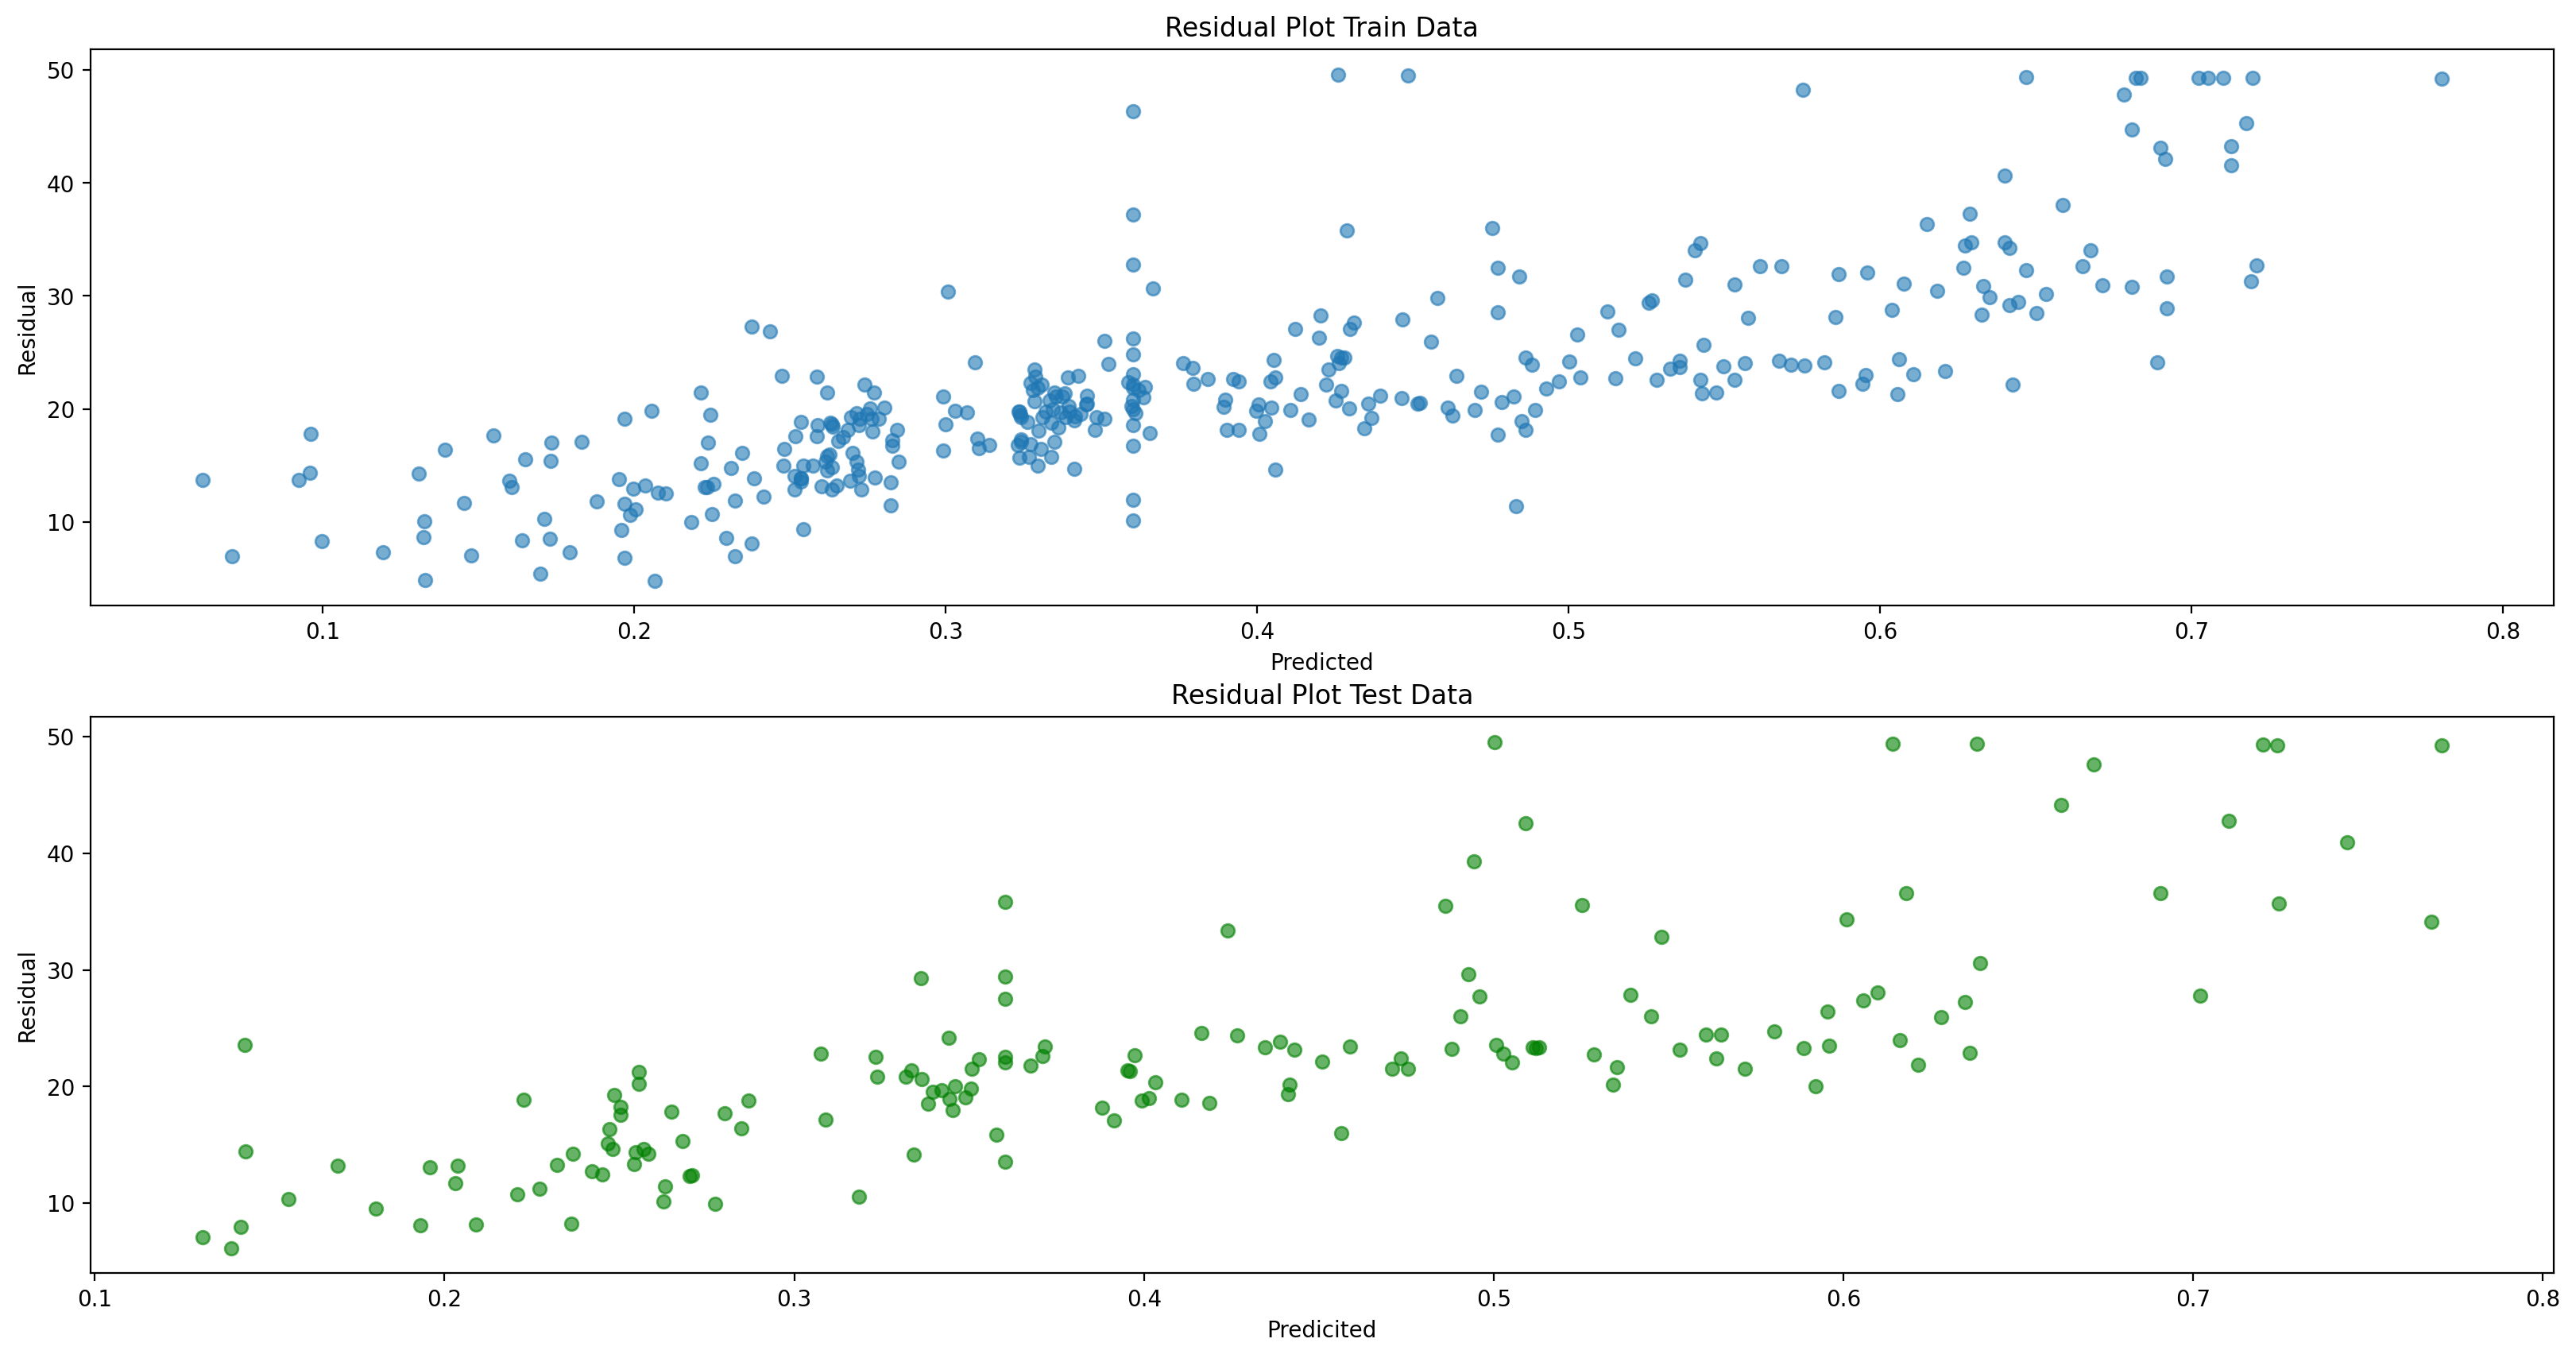

In [72]:
## plotting residual plot
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
ax[0].scatter(y_train_pred, y_train - y_train_pred, alpha=.6)
ax[0].set_title('Residual Plot Train Data')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Residual')

ax[1].scatter(y_test_pred, y_test - y_test_pred, color='green', alpha=.6)
ax[1].set_title('Residual Plot Test Data')
ax[1].set_xlabel('Predicited')
ax[1].set_ylabel('Residual');

In [38]:
X_train_s.shape

(354, 1)

In [43]:
idx_train

array([ 26, 295, 273, 100, 278,  85, 215,  86, 209,  91,  93, 329, 243,
         8, 122, 265, 247, 112, 294, 347, 224, 240, 283, 187,   3, 197,
       234,  46, 207, 290,  96, 167, 337,  44,  60, 339, 173, 144, 201,
       271, 159,  74, 212, 253, 256, 179, 241,   9, 109,  73,  54, 350,
       249, 246,  21, 181,  63, 242, 255, 335,  80, 137,  53, 160,  14,
       118, 123, 120,  10, 334,  35,  72, 198,  24,  83,  17, 254, 248,
       245, 336, 146,   4, 142, 189, 259, 163, 293, 266, 263,  55,   5,
       320, 199, 232, 107,  42, 312, 345, 203, 156, 284, 307,  29,   0,
       117, 285, 208,  31, 252, 353,  27,  47, 106, 233, 311,  36, 349,
        45,  50, 115,  67, 186, 323, 153, 225, 165, 287,   7, 125, 134,
        58, 180, 205, 289, 340, 140, 166, 195, 105,  87,  34,  66, 158,
        61, 235,  18, 188, 274, 161, 217,  68, 211, 145, 171, 352,  94,
       236,  71, 131, 221, 223, 228,  77, 114,  19, 103,  23, 124, 174,
       132,  32, 178, 280, 152, 138, 258, 126, 150,  81,  84, 29

In [46]:
np.argsort(X_test_s, axis=0).ravel()

array([ 46, 118,  66, 115,  32,  76, 110, 144,  79,  59,  98,  11,  17,
        24,   6, 122,  85,  65,  87,  91,  52, 129,  82,  30, 107, 140,
        90, 102,  57,  23,  70, 132, 143, 113,  61, 148,  55,  41, 103,
       135,   1, 146, 134,  28,  40,  78,  18, 119,   0, 138,  42, 109,
        10, 114,   3,  97,  77, 126,  67,   9, 111, 127,  34, 145,  22,
       124, 150, 116,  48, 120,   4,  13,  81, 131,  68,  75,  27,  49,
        53,   5,  51,  16,  15,  37,  84,  50,  96,  20,  69, 117,  14,
        73, 105,  93, 125,  99,   7, 108,  95,  35,  12,  72,  74,  88,
       130, 123,  94,  58, 128,  39,  60,  80, 100,  47,  33,  21,  89,
       106, 139,  63,  36,   8, 149,  44,  92, 141,  31, 142, 121,   2,
       101, 137,  86, 151,  62,  26,  29, 147, 112,  45,  83,  38,  43,
        25, 133, 136,  71,  19,  64,  54,  56, 104])